In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing

In [63]:
df_baz = pd.read_excel(r"X_bp.xlsx")
df_baz.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [64]:
df_baz.drop(['Unnamed: 0'], axis=1, inplace=True)

In [65]:
df_ugl = pd.read_excel(r"X_nup.xlsx")
df_ugl.shape
df_ugl.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0
3,3,0,5.0,47.0
4,4,0,5.0,57.0


In [66]:
df_ugl.drop(['Unnamed: 0'], axis=1, inplace=True)

In [67]:
df = df_baz.merge(df_ugl, left_index = True, right_index = True, how = 'inner')
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [68]:
#уточним, сколько записей в датасете
df.shape

(1023, 13)

In [69]:
# проверим датасет на дубликаты
df.duplicated().sum()
#дбликатов нет

0

In [70]:
#проверим, есть ли пустые ячейки
df.isnull().mean() * 100
#видим, что пустых значений нет

Соотношение матрица-наполнитель         0.0
Плотность, кг/м3                        0.0
модуль упругости, ГПа                   0.0
Количество отвердителя, м.%             0.0
Содержание эпоксидных групп,%_2         0.0
Температура вспышки, С_2                0.0
Поверхностная плотность, г/м2           0.0
Модуль упругости при растяжении, ГПа    0.0
Прочность при растяжении, МПа           0.0
Потребление смолы, г/м2                 0.0
Угол нашивки, град                      0.0
Шаг нашивки                             0.0
Плотность нашивки                       0.0
dtype: float64

In [71]:
#посмотрим информацию о датасете
df.info()
# все переменные содержат значения float64, отсутствуют записи "NaN:, очистка не требуется, файл содержит 1023 строки.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [72]:
#найдем количество уникальных значений
df.nunique()
#видим, что в столбце "Угол нашивки, град", только 2 параметра

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [73]:
#выведем данные значения
df['Угол нашивки, град'].unique()
#видим, что используется только 2 параметра - 90 и 0 градусов

array([ 0, 90], dtype=int64)

In [74]:
#посмотрим в скольких случаях используется угол в 0 граудосов
sum_grad_zero = df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count()
sum_grad_zero

520

In [75]:
#посмотрим в скольких случаях используется угол в 90 граудосов
sum_grad_ninety = df['Угол нашивки, град'][df['Угол нашивки, град'] == 90.0].count()
sum_grad_ninety

503

In [76]:
#посчитаем процентное отношения углов нашивки
sum_grad = sum_grad_zero + sum_grad_ninety
sum_grad_zero_percent = sum_grad_zero / sum_grad
print("{:.0%}".format(sum_grad_zero_percent))
# угол в ноль градусов используется в 51% случаях

51%


In [77]:
sum_grad_ninety_percent = sum_grad_ninety / sum_grad
print("{:.0%}".format(sum_grad_ninety_percent))
#угол в 49% используется в 49% случаях

49%


In [78]:
# проихводим обнаружение аномалий, с помощью боксплотов
for column in df.columns:
    fig = px.box(df, y = column)
    fig.show()


Соотношение матрица-наполнитель


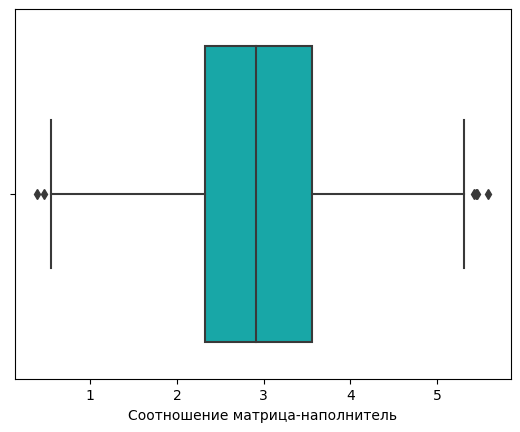

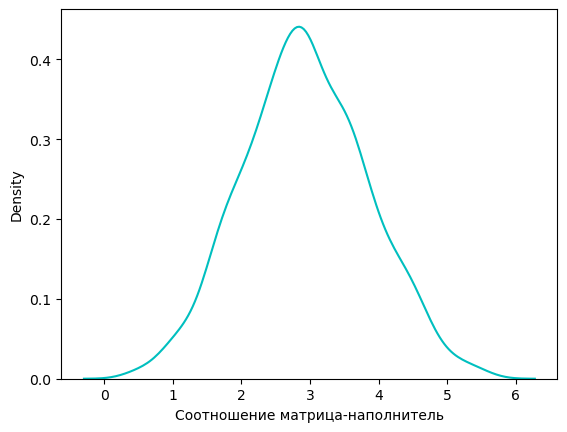

Плотность, кг/м3


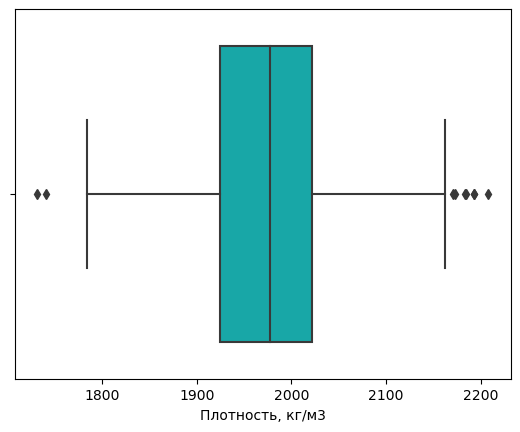

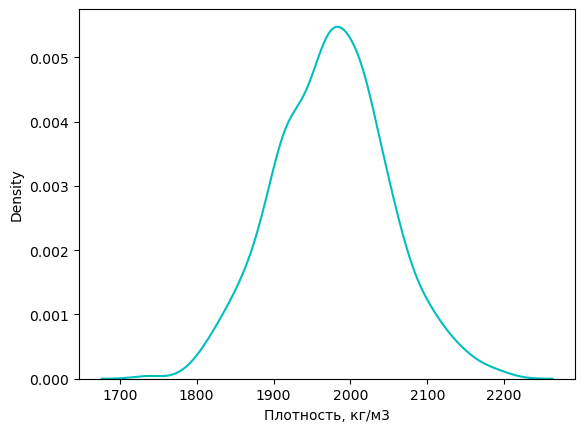

модуль упругости, ГПа


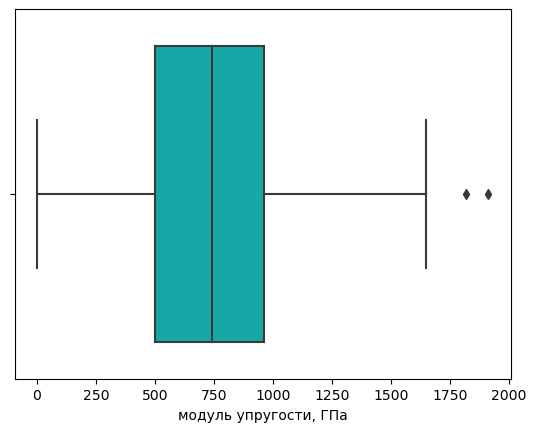

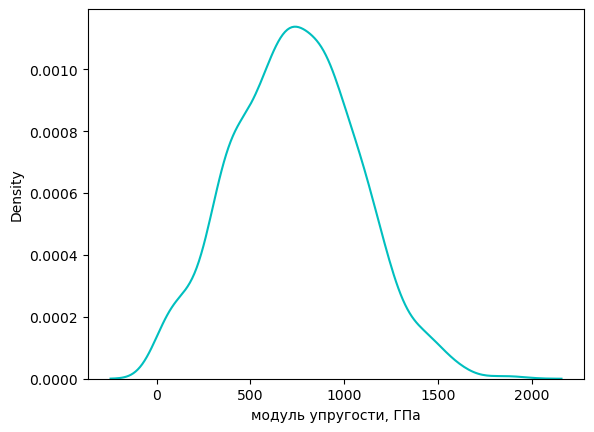

Количество отвердителя, м.%


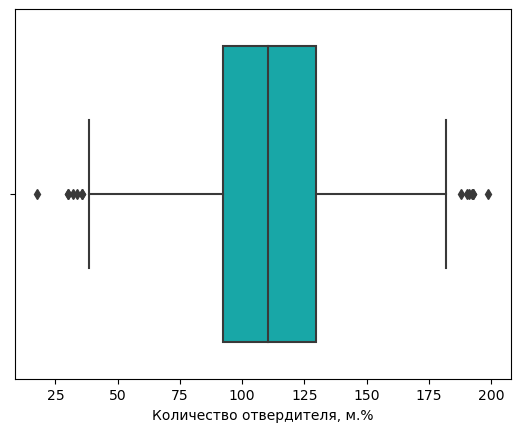

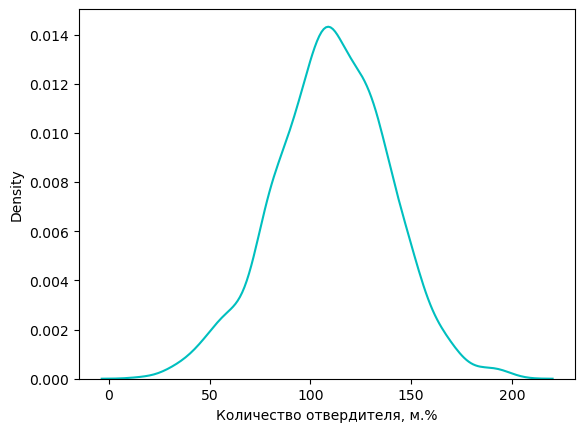

Содержание эпоксидных групп,%_2


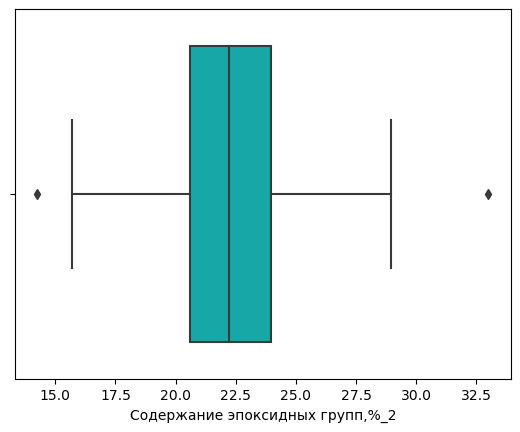

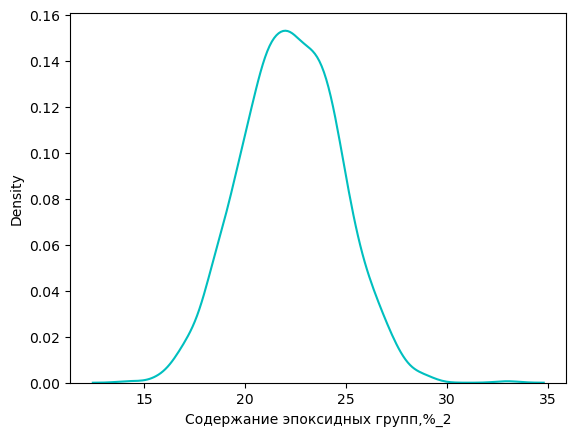

Температура вспышки, С_2


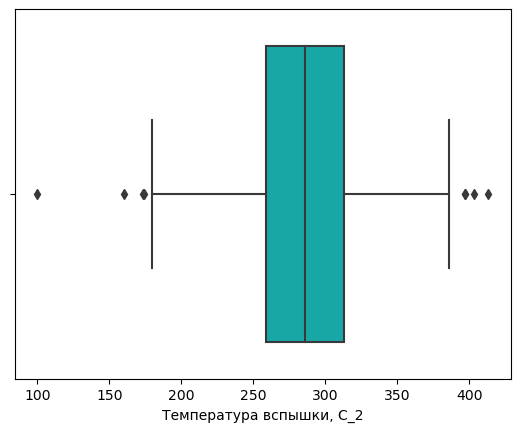

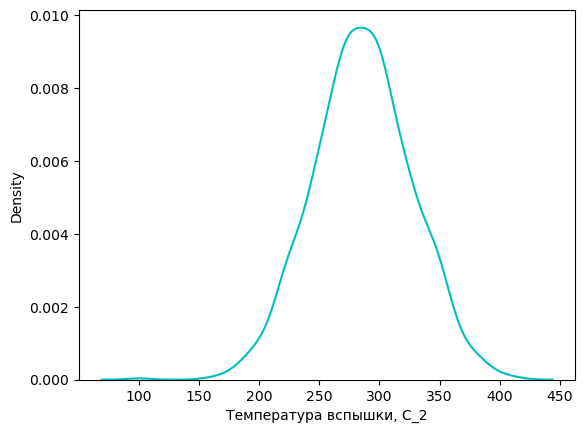

Поверхностная плотность, г/м2


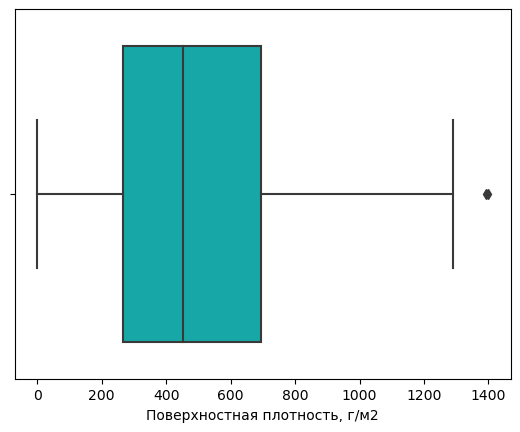

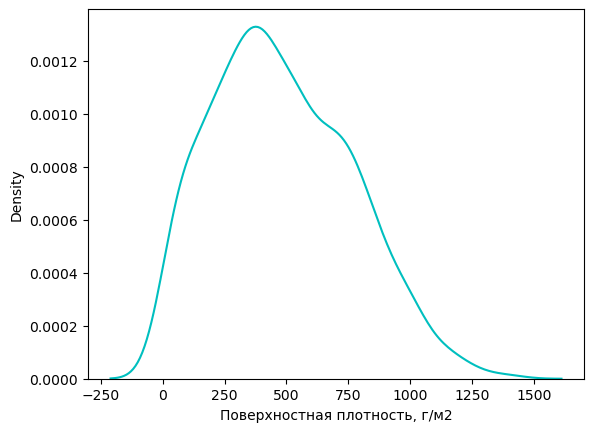

Модуль упругости при растяжении, ГПа


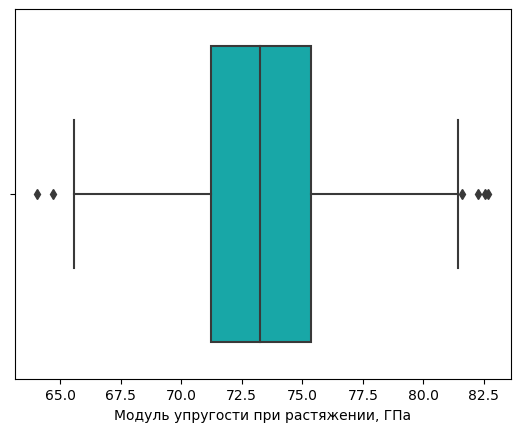

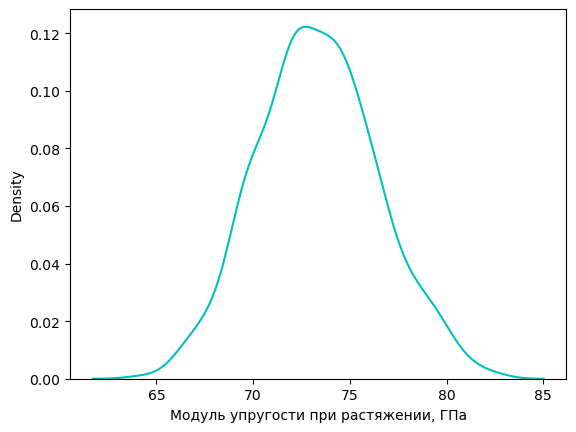

Прочность при растяжении, МПа


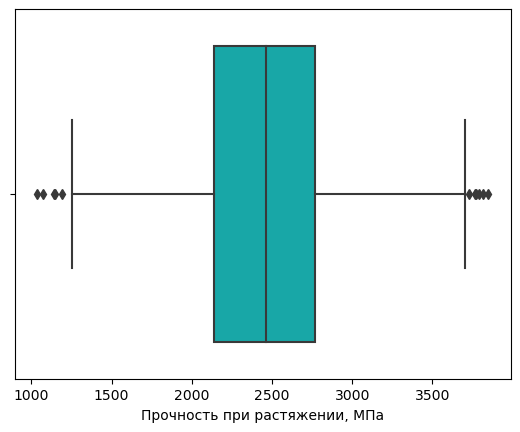

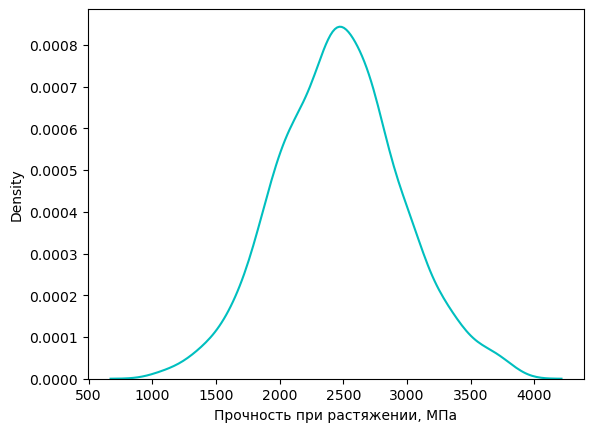

Потребление смолы, г/м2


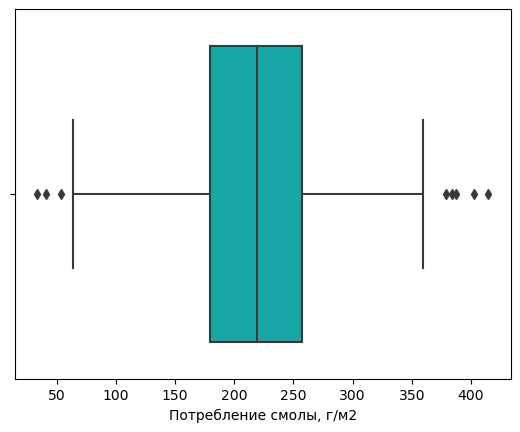

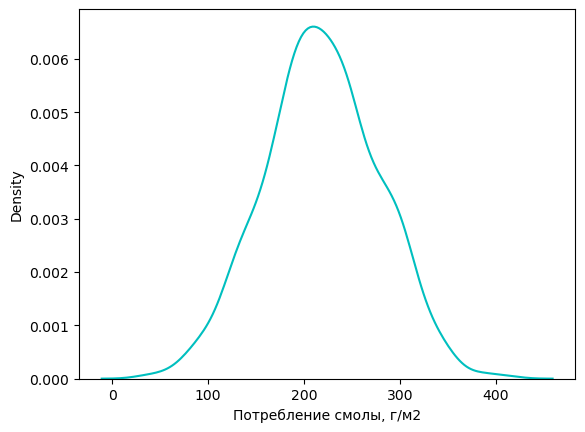

Угол нашивки, град


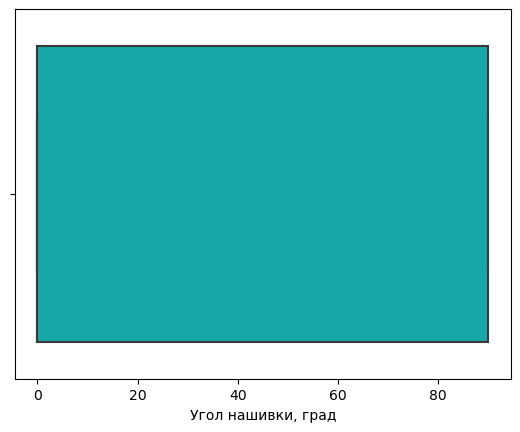

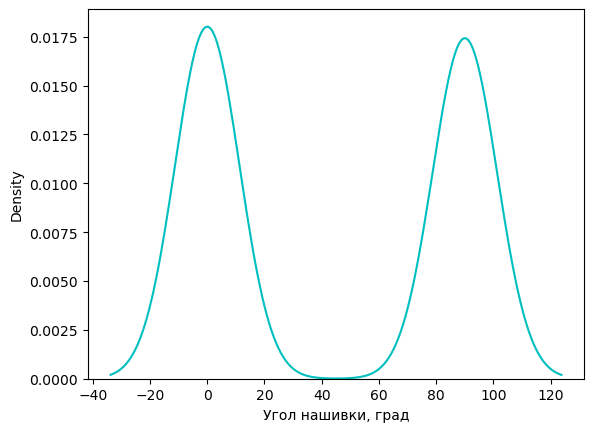

Шаг нашивки


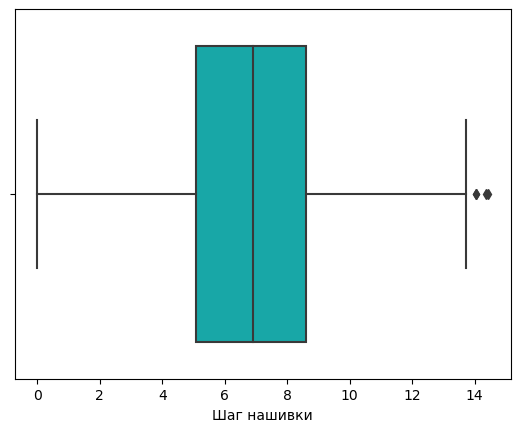

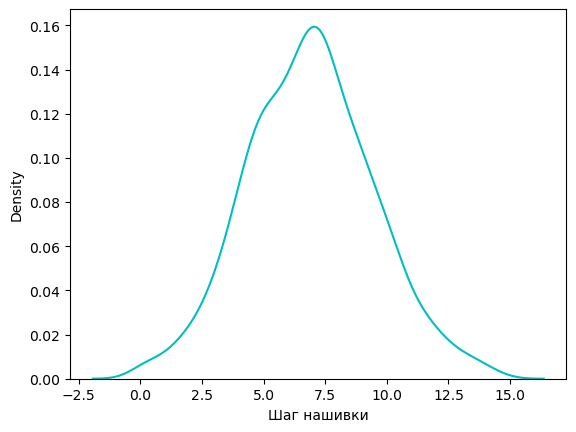

Плотность нашивки


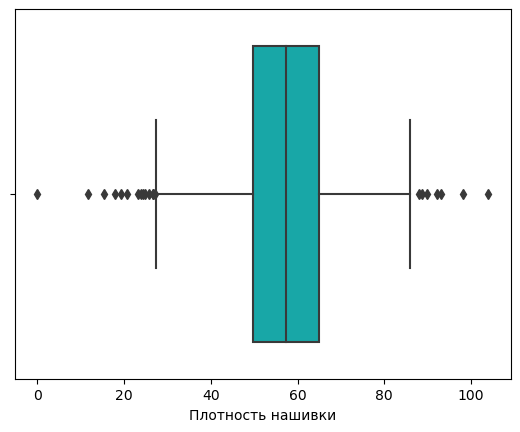

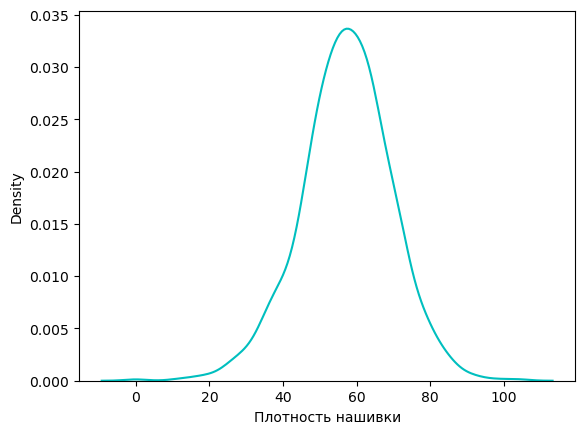

In [79]:
# для более подробного рассмотрения выбросов построим гистограмму вместе с боксплотом по каждому столбцу
column_name = df.columns
for column_name in column_name:
  print(column_name)

  #боксплот
  cname = df[column_name]
  sns.boxplot(x=cname, color = "c");
  plt.show()  
    
  #гистограмма
  sns.kdeplot(data = cname, color = "c")
  plt.show()


In [80]:
#найдем количество выбросов с помощью метода межквартальных диапазонов (IQR)
metod_iqr = 0
summ_iqr = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма методом.
for column in df:
    d = df.loc[:, [column]]

    q1 = np.quantile(df[column], 0.25)

    q3 = np.quantile(df[column], 0.75)
    
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    metod_iqr += d['iq'].sum()
    summ_iqr.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('Метод межквартильных расстояний, выбросов:', metod_iqr)


Соотношение матрица-наполнитель :  6
Плотность, кг/м3 :  9
модуль упругости, ГПа :  2
Количество отвердителя, м.% :  14
Содержание эпоксидных групп,%_2 :  2
Температура вспышки, С_2 :  8
Поверхностная плотность, г/м2 :  2
Модуль упругости при растяжении, ГПа :  6
Прочность при растяжении, МПа :  11
Потребление смолы, г/м2 :  8
Угол нашивки, град :  0
Шаг нашивки :  4
Плотность нашивки :  21
Метод межквартильных расстояний, выбросов: 93


In [81]:
#создадим список столбцов, в которых есть выбросы
column_drop = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]

In [82]:
#удаляем выбросы
for i in column_drop:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df = df.dropna(axis=0)

In [83]:
#проверим остались ли, NaN значения
df.isnull().sum()
#NaN значения не обнаружены

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [84]:
# проверим ещё раз наличие выбросов
metod_iqr = 0
summ_iqr = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма методом.
for column in df:
    d = df.loc[:, [column]]

    q1 = np.quantile(df[column], 0.25)

    q3 = np.quantile(df[column], 0.75)
    
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    metod_iqr += d['iq'].sum()
    summ_iqr.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('Метод межквартильных расстояний, выбросов:', metod_iqr)

Соотношение матрица-наполнитель :  0
Плотность, кг/м3 :  0
модуль упругости, ГПа :  1
Количество отвердителя, м.% :  0
Содержание эпоксидных групп,%_2 :  0
Температура вспышки, С_2 :  0
Поверхностная плотность, г/м2 :  0
Модуль упругости при растяжении, ГПа :  1
Прочность при растяжении, МПа :  4
Потребление смолы, г/м2 :  1
Угол нашивки, град :  0
Шаг нашивки :  0
Плотность нашивки :  3
Метод межквартильных расстояний, выбросов: 10


In [85]:
#ещё раз удаляем выбросы
for i in column_drop:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df = df.dropna(axis=0)

In [86]:
# проверим ещё раз наличие выбросов
metod_iqr = 0
summ_iqr = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма методом.
for column in df:
    d = df.loc[:, [column]]

    q1 = np.quantile(df[column], 0.25)

    q3 = np.quantile(df[column], 0.75)
    
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    metod_iqr += d['iq'].sum()
    summ_iqr.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('Метод межквартильных расстояний, выбросов:', metod_iqr)

Соотношение матрица-наполнитель :  0
Плотность, кг/м3 :  0
модуль упругости, ГПа :  0
Количество отвердителя, м.% :  0
Содержание эпоксидных групп,%_2 :  0
Температура вспышки, С_2 :  0
Поверхностная плотность, г/м2 :  0
Модуль упругости при растяжении, ГПа :  0
Прочность при растяжении, МПа :  2
Потребление смолы, г/м2 :  1
Угол нашивки, град :  0
Шаг нашивки :  0
Плотность нашивки :  1
Метод межквартильных расстояний, выбросов: 4


In [87]:
#ещё раз удаляем выбросы
for i in column_drop:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df = df.dropna(axis=0)

In [88]:
#найдем количество выбросов с помощью метода межквартальных диапазонов (IQR)
metod_iqr = 0
summ_iqr = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма методом.
for column in df:
    d = df.loc[:, [column]]

    q1 = np.quantile(df[column], 0.25)

    q3 = np.quantile(df[column], 0.75)
    
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    metod_iqr += d['iq'].sum()
    summ_iqr.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('Метод межквартильных расстояний, выбросов:', metod_iqr)

Соотношение матрица-наполнитель :  0
Плотность, кг/м3 :  0
модуль упругости, ГПа :  0
Количество отвердителя, м.% :  0
Содержание эпоксидных групп,%_2 :  0
Температура вспышки, С_2 :  0
Поверхностная плотность, г/м2 :  0
Модуль упругости при растяжении, ГПа :  0
Прочность при растяжении, МПа :  0
Потребление смолы, г/м2 :  0
Угол нашивки, град :  0
Шаг нашивки :  0
Плотность нашивки :  0
Метод межквартильных расстояний, выбросов: 0


In [94]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,2.927964,1974.118744,736.119982,111.136066,22.200570,286.181128,482.429070,73.303464,2461.491315,218.048059,45.976139,6.931939,57.562887
std,0.895472,71.040648,327.607008,26.753228,2.393926,39.420764,280.437329,3.025864,453.564734,57.137475,45.013829,2.514184,11.122204
min,0.547391,1784.482245,2.436909,38.668500,15.695894,179.374391,0.603740,65.793845,1250.392802,72.530873,0.000000,0.037639,28.661632
25%,2.320191,1923.318006,498.538615,92.856591,20.556328,259.205321,264.345872,71.241213,2148.175736,179.875097,0.000000,5.143644,50.275385
50%,2.907832,1977.321002,736.178435,111.162090,22.177681,286.220763,457.732246,73.247594,2455.974462,218.697660,90.000000,6.972862,57.584225
75%,3.549367,2020.053266,956.955626,130.109815,23.956980,313.012786,695.531920,75.310130,2751.233766,256.623860,90.000000,8.612094,64.840898
max,5.314144,2161.565216,1628.000000,181.828448,28.955094,386.067992,1291.340115,81.203147,3654.434359,359.052220,90.000000,13.732404,86.012427


In [95]:
scaler = preprocessing.MinMaxScaler()

names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,0.499412,0.502904,0.451341,0.506200,0.490578,0.516739,0.373295,0.487343,0.503776,0.507876,0.510846,0.503426,0.503938
std,0.187858,0.188395,0.201534,0.186876,0.180548,0.190721,0.217269,0.196366,0.188668,0.199418,0.500154,0.183587,0.193933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.371909,0.368184,0.305188,0.378514,0.366571,0.386228,0.204335,0.353512,0.373447,0.374647,0.000000,0.372844,0.376869
50%,0.495189,0.511396,0.451377,0.506382,0.488852,0.516931,0.354161,0.483718,0.501481,0.510143,1.000000,0.506414,0.504310
75%,0.629774,0.624719,0.587193,0.638735,0.623046,0.646553,0.538397,0.617568,0.624299,0.642511,1.000000,0.626112,0.630842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
#Рассмотрим второй вариант корреляции между параметрами после нормализации (второй вариант)
scaled_df[scaled_df.columns].corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.007996,0.051643,0.001353,0.021982,-0.010565,0.011910,-0.024316,0.019141,0.076857,-0.032144,0.039924,0.047835
"Плотность, кг/м3",0.007996,1.000000,-0.001416,-0.048938,0.004568,-0.021256,0.061496,-0.015597,-0.079188,-0.009609,-0.052993,-0.048648,0.086460
"модуль упругости, ГПа",0.051643,-0.001416,1.000000,0.044550,-0.001442,0.037622,-0.007805,0.020063,0.031041,0.008368,-0.031490,0.010238,0.078810
"Количество отвердителя, м.%",0.001353,-0.048938,0.044550,1.000000,0.011429,0.070623,0.038762,-0.057026,-0.065711,-0.014827,0.034103,-0.017394,0.007981
"Содержание эпоксидных групп,%_2",0.021982,0.004568,-0.001442,0.011429,1.000000,-0.025315,-0.015844,0.053887,-0.013099,0.010808,0.034520,0.007571,-0.034481
"Температура вспышки, С_2",-0.010565,-0.021256,0.037622,0.070623,-0.025315,1.000000,0.020307,0.014168,-0.017263,0.048142,0.002371,0.034395,-0.015014
"Поверхностная плотность, г/м2",0.011910,0.061496,-0.007805,0.038762,-0.015844,0.020307,1.000000,0.033526,-0.027320,-0.012606,0.053180,0.036931,-0.034989
"Модуль упругости при растяжении, ГПа",-0.024316,-0.015597,0.020063,-0.057026,0.053887,0.014168,0.033526,1.000000,-0.002393,0.051676,0.031910,-0.010193,0.012488
"Прочность при растяжении, МПа",0.019141,-0.079188,0.031041,-0.065711,-0.013099,-0.017263,-0.027320,-0.002393,1.000000,0.016753,0.016144,-0.051580,0.016311
"Потребление смолы, г/м2",0.076857,-0.009609,0.008368,-0.014827,0.010808,0.048142,-0.012606,0.051676,0.016753,1.000000,0.000433,0.009932,0.008012
